In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv("5.urldata.csv")
data0.head()

Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  graphicriver.net        0        0           1          1            0   
1         ecnavi.jp        0        0           1          1            1   
2      hubpages.com        0        0           1          1            0   
3   extratorrent.cc        0        0           1          3            0   
4     icicibank.com        0        0           1          3            0   

   https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  \
0             0        0              0           0            1           1   
1             0        0              0           0            1           1   
2             0        0              0           0            1           0   
3             0        0              0           0            1           0   
4             0        0              0           0            1           0   

   Domain_End  iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0           1       0           0            1             0      0  
1           1       0           0            1             0      0  
2           1       0           0            1             0      0  
3           1       0           0            1             0      0  
4           1       0           0            1             0      0

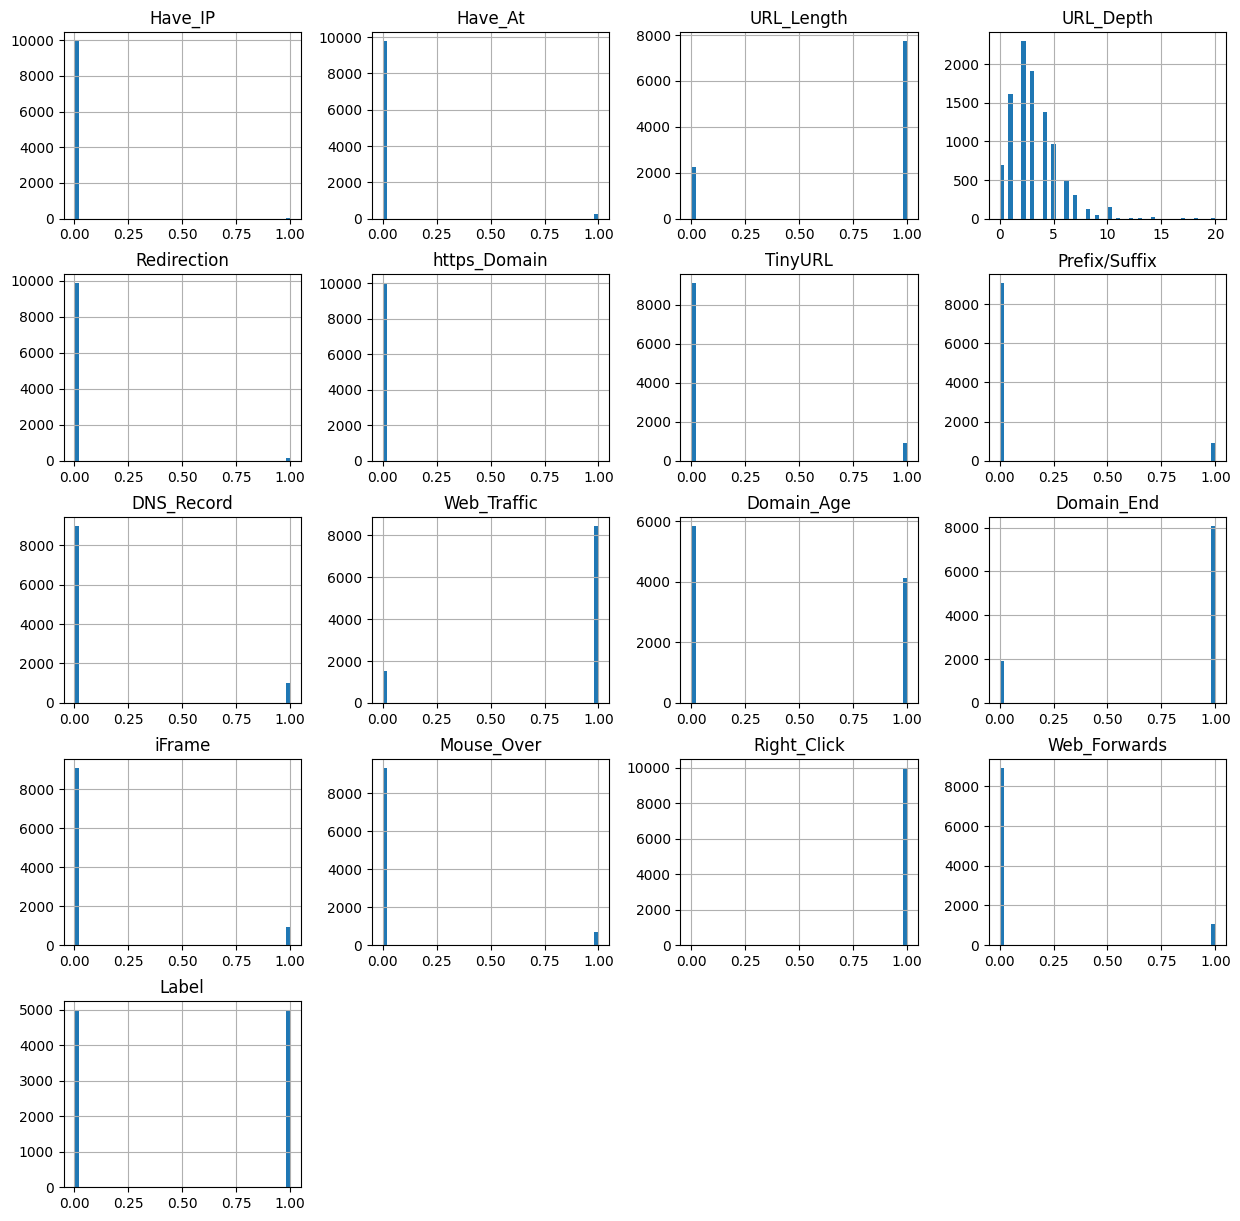

In [5]:

data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [7]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [9]:

data = data.sample(frac=1).reset_index(drop=True)
data.head()

Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0        0        0           1          3            0             0   
1        0        0           0          0            0             0   
2        0        0           0          2            0             0   
3        0        0           0          0            0             0   
4        0        0           0          4            0             0   

   TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  \
0        0              0           0            1           0           1   
1        0              1           0            0           0           1   
2        0              0           0            1           0           0   
3        1              0           0            1           0           1   
4        0              0           1            1           1           1   

   iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0       0           0            1             0      0  
1       0           0            1             0      1  
2       0           0            1             0      1  
3       0           0            1             0      1  
4       0           0            1             0      1

In [21]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1).values
X.shape, y.shape

((10000, 16), (10000,))

In [22]:
X

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [23]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [14]:

from sklearn.metrics import accuracy_score

In [24]:

ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [25]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [27]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.816
Decision Tree: Accuracy on test Data: 0.802


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

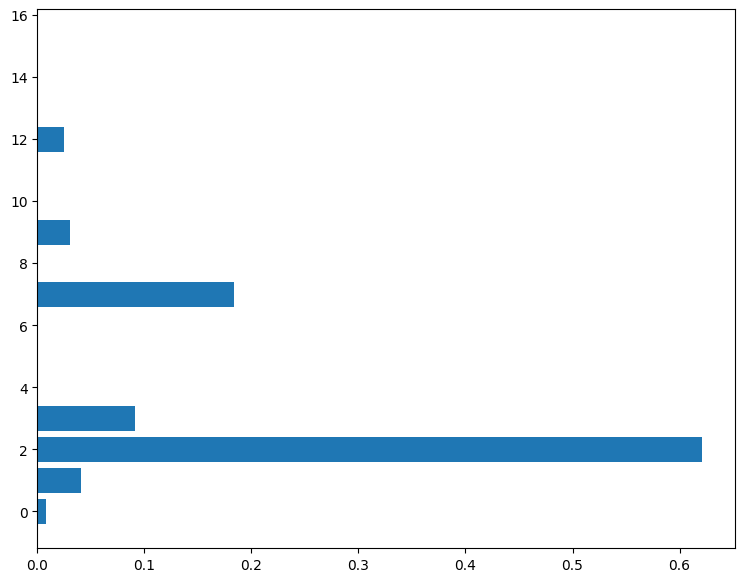

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [20]:

storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [29]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [30]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [31]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.820
Random forest: Accuracy on test Data: 0.804


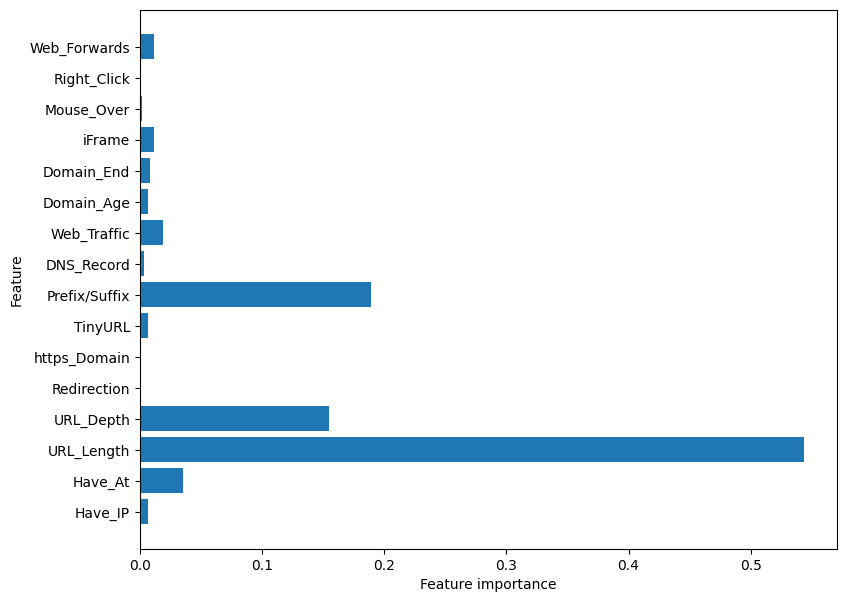

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [32]:

storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [33]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [34]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [35]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.866
Multilayer Perceptrons: Accuracy on test Data: 0.856


**Storing the results:**

In [32]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [38]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.868
XGBoost : Accuracy on test Data: 0.857


**Storing the results:**

In [39]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [46]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

ML Model  Train Accuracy  Test Accuracy
0           Decision Tree           0.812          0.820
1           Random Forest           0.819          0.824
2  Multilayer Perceptrons           0.865          0.858
3  Multilayer Perceptrons           0.865          0.858
4                 XGBoost           0.867          0.858
5             AutoEncoder           0.002          0.001
6                     SVM           0.800          0.806

In [47]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model  Train Accuracy  Test Accuracy
4                 XGBoost           0.867          0.858
2  Multilayer Perceptrons           0.865          0.858
3  Multilayer Perceptrons           0.865          0.858
1           Random Forest           0.819          0.824
0           Decision Tree           0.812          0.820
6                     SVM           0.800          0.806
5             AutoEncoder           0.002          0.001

For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [40]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier1.pickle.dat", "wb"))

**Testing the saved model:**

In [49]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/